# Digit Recognition Model for MNIST Dataset

<img src= "https://aigeekprogrammer.com/wp-content/uploads/2019/08/Handwriting-digit-recognition-Keras-MNIST.jpg"/>

## MNIST dataset:
MNIST is a collection of handwritten digits from 0-9. Image of size 28 X 28

## Introduction
MNIST contains 70,000 images of handwritten digits: 60,000 for training and 10,000 for testing. The images are grayscale, 28x28 pixels.

## Importing Data and Modules

In [50]:
import keras

# importing MNIST image data from Keras
from keras.datasets import mnist

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# modeling
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense

# data processing
import pandas as pd
import numpy as np

import random

In [51]:
#Splitting the dataset into Train and Test data
digits = mnist.load_data()

#Unpacking 
(X_train, Y_train), (X_test, Y_test) = digits

In [52]:
# shape of the Data
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


The Keras MINST data 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. 

In [53]:
#  Checking Data Distribution for Target Variable
unique, counts = np.unique(Y_train, return_counts=True)
print( np.asarray((unique, counts)).T)

[[   0 5923]
 [   1 6742]
 [   2 5958]
 [   3 6131]
 [   4 5842]
 [   5 5421]
 [   6 5918]
 [   7 6265]
 [   8 5851]
 [   9 5949]]


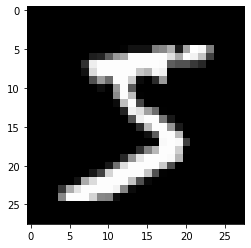

5


In [54]:
# looking at the data 
#First Record
plt.imshow(X_train[0], cmap = 'gray')
plt.show()
print(Y_train[0])

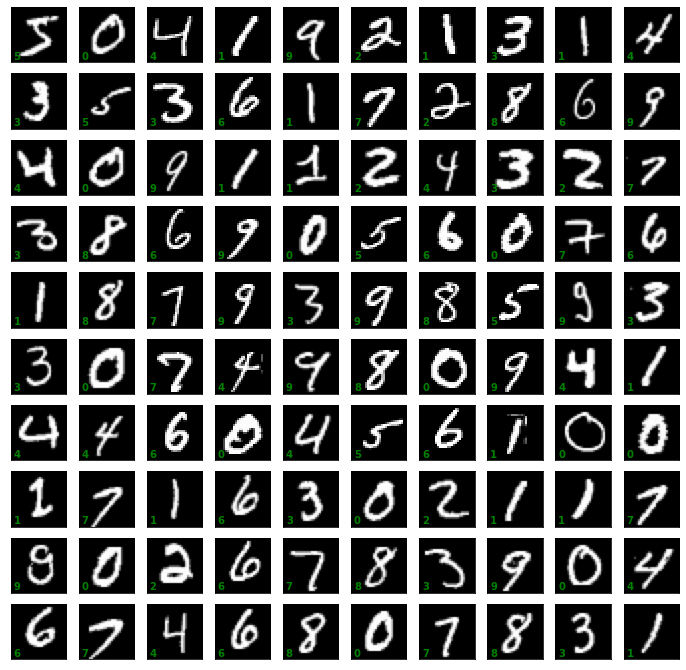

In [55]:
# Vizualizaing top 100 records
fig, axes = plt.subplots(10, 10, figsize=(12, 12), subplot_kw={'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap = 'gray')
    ax.text(0.05, 0.05, str(Y_train[i]), color='green', 
            weight='semibold', transform=ax.transAxes)

## Normalizing the Data

In [56]:
# Normalizing the data
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

Tried running the model without normalization and it does a significant effect if we don't.

In [57]:
def init_seeds(s):
    tf.random.set_seed(s)
    np.random.seed(s)
    random.seed(s)

# initialize seeds
init_seeds(314)

## Sequential Model

In [58]:
model = tf.keras.models.Sequential()
#Sequential model is a feed forward model.

# Now adding layers to nn model

################
# INPUT LAYER  # 
################

# we need to flatten the input layer because our data is array of 28x28.
model.add(tf.keras.layers.Flatten())

################
# HIDDEN LAYER #
################
model.add(tf.keras.layers.Dense(128, activation = tf.nn.sigmoid))  
# 128 = no. of neurons 
# activation - what funtion activates the neuron (sigmoid / relu - rectified linear etc)

#  Dense layer:  it's a densely-connected layer,
#  meaning each node connects to each prior and subsequent node. 
model.add(tf.keras.layers.Dense(128, activation = tf.nn.sigmoid))

################
# OUTPUT LAYER #
################

model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax)) 
# nodes = 10, 1 node per possible number prediction.
# activation: In this case we use 'softmax' because we need a function that can give us possible 
# probability prediction of out outputs.

####################
# Compiling Model  #
####################

model.compile(optimizer = 'adam' , loss= 'sparse_categorical_crossentropy', metrics = 'accuracy')  
# optimizer:  
# loss: nn doesn't try to improve accuracy, it always try to minimize loss
# sparse_categorical_crossentropy

###############
# Train Model #
###############

model.fit(X_train, Y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 2s 921us/step - loss: 0.5257 - accuracy: 0.8561
Epoch 2/10
1875/1875 [==============================] - 2s 908us/step - loss: 0.2201 - accuracy: 0.9347
Epoch 3/10
1875/1875 [==============================] - 2s 968us/step - loss: 0.1597 - accuracy: 0.9521
Epoch 4/10
1875/1875 [==============================] - 2s 940us/step - loss: 0.1229 - accuracy: 0.9628
Epoch 5/10
1875/1875 [==============================] - 2s 977us/step - loss: 0.0984 - accuracy: 0.9707
Epoch 6/10
1875/1875 [==============================] - 2s 982us/step - loss: 0.0817 - accuracy: 0.9749
Epoch 7/10
1875/1875 [==============================] - 2s 924us/step - loss: 0.0680 - accuracy: 0.9796
Epoch 8/10
1875/1875 [==============================] - 2s 925us/step - loss: 0.0584 - accuracy: 0.9825
Epoch 9/10
1875/1875 [==============================] - 2s 909us/step - loss: 0.0494 - accuracy: 0.9851
Epoch 10/10
1875/1875 [==============================] - 2s 894u

#### Check the model accuracy on the test sample

In [59]:
loss, accuracy = model.evaluate(X_test, Y_test, batch_size=1)

print(f'Loss: {loss:.2%}, Accuracy: {accuracy:.2%}')

10000/10000 [==============================] - 5s 468us/step - loss: 0.0927 - accuracy: 0.9723
Loss: 9.27%, Accuracy: 97.23%


We tried multiple combination of activation fumction (relu,sigmoid) and optimizer(adam, sgd) , with and without normalizing data.       

- Results on Test Data (with Normalization):

|Combination|Loss|Accuracy|					
|---|---|---|
|sigmoid & sgd  |58.36%|84.38%|	
|<font color='green'>sigmoid  & adam</font>|<font color='green'>9.27%</font>|<font color='green'>97.23%</font>|
|relu & sgd     |18.19%|94.60%|
|relu  & adam   |12.15%|97.10%|

- Results on Test Data (without Normalization)

|Combination|Loss|Accuracy|					
|---|---|---|
|sigmoid & sgd|23.01%|93.34%|
|sigmoid  & adam|21.91%|93.12%|
|relu & sgd|235.17%|11.35%|
|relu  & adam|17.79%|96.36%|

It is clear from the above results that we need activation = sigmoid and optimizer = adam and normalizie data in order to minimize the loss and have higher accuracy.

## Save the Model

In [60]:
outputfile= 'D:/D_ST/Git_Profile/MNIST digits classification/MNIST_Model_OUTPUT.model'
model.save(outputfile)

INFO:tensorflow:Assets written to: D:/D_ST/Git_Profile/MNIST digits classification/MNIST_Model_OUTPUT.model\assets


## Load The Model

In [61]:
from tensorflow.keras.models import load_model
final_model = load_model(outputfile)
final_model.summary()
final_model.optimizer

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_30 (Dense)            (None, 128)               100480    
                                                                 
 dense_31 (Dense)            (None, 128)               16512     
                                                                 
 dense_32 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [62]:
predictions = final_model.predict(X_test)
predictions

array([[2.73037237e-08, 2.14278430e-07, 1.46925265e-06, ...,
        9.99891162e-01, 6.08865136e-08, 9.40331461e-07],
       [6.47436380e-08, 2.47206161e-04, 9.99617934e-01, ...,
        2.13839293e-08, 1.75010075e-06, 1.31588754e-10],
       [5.30070521e-09, 9.99917626e-01, 1.20486102e-05, ...,
        6.95817334e-06, 1.96611545e-05, 2.30898163e-08],
       ...,
       [4.94024999e-09, 6.59206876e-07, 1.12437206e-07, ...,
        7.98238943e-06, 2.30109399e-05, 1.54740657e-04],
       [2.28332393e-08, 3.47401993e-07, 1.07014131e-09, ...,
        1.33618165e-08, 2.60236149e-04, 1.96026306e-08],
       [1.69573250e-05, 5.12800852e-07, 1.45401339e-06, ...,
        3.88822918e-10, 4.69630550e-07, 1.06233511e-08]], dtype=float32)

Let's check Actual Value and Predicted Value for our test data set

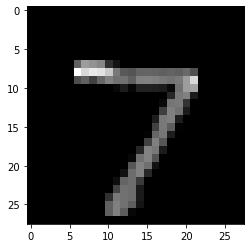

In [63]:
# Original Values
plt.imshow(X_test[0],cmap='gray')
plt.show()

In [64]:
# Predicted Value
print(np.argmax(predictions[0]))

7


## Vizualizing the Predictions

In [65]:
preds_raw = model.predict(X_test)

# grab the predicted digit (based on the highest probability) for the entire dataset
preds = [np.argmax(pred) for pred in model.predict(X_test)]

# view the first ten predictions
preds[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

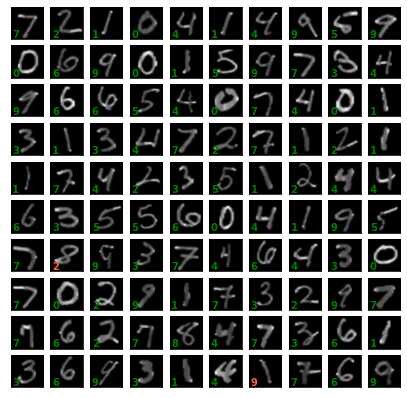

In [66]:
# Visualizing for first 100 values
fig, axes = plt.subplots(10, 10, figsize=(7, 7), subplot_kw={'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i], cmap='gray', interpolation='bicubic')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    pred = preds[i]
    act = Y_test[i]
    if pred == act:
        ax.text(0.05, 0.05, preds[i], color='green',
                weight='semibold', transform=ax.transAxes)
    else:
        ax.text(0.05, 0.05, preds[i], color='tomato',
                weight='semibold', transform=ax.transAxes)
plt.show();

We can observe that our model has predicted TWO value wrong for the first 100 images

## Image Classification Model using CNN

In [67]:
# initialize seeds
init_seeds(314)

cnn = Sequential(
    [
        tf.keras.layers.Conv2D(filters=28, 
            kernel_size=(4, 4), 
            activation='relu', 
            input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((3, 3)),
        tf.keras.layers.Flatten(),
            Dense(128, activation='relu'),
            Dense(64, activation='relu'),
            Dense(10, activation='softmax')
    ], 
    name='cnn')

cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

cnn.fit(X_train, Y_train, epochs=10, shuffle=True);

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2041 - accuracy: 0.9380
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0688 - accuracy: 0.9790
Epoch 3/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0480 - accuracy: 0.9851
Epoch 4/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0364 - accuracy: 0.9886
Epoch 5/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0275 - accuracy: 0.9906
Epoch 6/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0209 - accuracy: 0.9933
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0178 - accuracy: 0.9940
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0144 - accuracy: 0.9952
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0131 - accuracy: 0.9954
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.009

In [68]:
loss, accuracy = cnn.evaluate(X_test, Y_test, batch_size=1)

print(f'Loss: {loss:.2%}, Accuracy: {accuracy:.2%}')

10000/10000 [==============================] - 6s 599us/step - loss: 0.0563 - accuracy: 0.9864
Loss: 5.63%, Accuracy: 98.64%


Tried Multiple combinations pf parameters:

1.    
           
tf.keras.layers.Conv2D(filters=28, 

kernel_size=(3, 3), 

activation='relu', 

input_shape=(28, 28, 1)),

tf.keras.layers.MaxPooling2D((2, 2)),

tf.keras.layers.Flatten(),

Dense(128, activation='relu'),

Dense(64, activation='relu'),

Dense(10, activation='softmax')

<font color='green'>Loss: 8.83%, Accuracy: 98.26%</font>

2. 
              
tf.keras.layers.Conv2D(filters=28, 

kernel_size=(4, 4), 

activation='relu', 

input_shape=(28, 28, 1)),

tf.keras.layers.MaxPooling2D((3, 3)),

tf.keras.layers.Flatten(),

Dense(128, activation='relu'),

Dense(64, activation='relu'),

Dense(10, activation='softmax')

<font color='green'>Loss: 5.63%, Accuracy: 98.64%</font>

3. 

tf.keras.layers.Conv2D(filters=28, 

kernel_size=(4, 4), 

activation='sigmoid', 

input_shape=(28, 28, 1)),

tf.keras.layers.MaxPooling2D((3, 3)),

tf.keras.layers.Flatten(),

Dense(128, activation='sigmoid'),

Dense(64, activation='sigmoid'),

Dense(10, activation='softmax')

<font color='green'>Loss: 7.06%, Accuracy: 97.63%</font>

4.      
     
tf.keras.layers.Conv2D(filters=28, 

kernel_size=(6, 6), 

activation='relu', 

input_shape=(28, 28, 1)),

tf.keras.layers.MaxPooling2D((3, 3)),

tf.keras.layers.Flatten(),

Dense(128, activation='relu'),

Dense(64, activation='relu'),

Dense(10, activation='relu')

<font color='red'>Loss: 230.27%, Accuracy: 9.80%</font>


We were able to achieve the highest accuracy and lowest loss when we used '2' Combination of parameters.

Loss: 5.63%, Accuracy: 98.64%


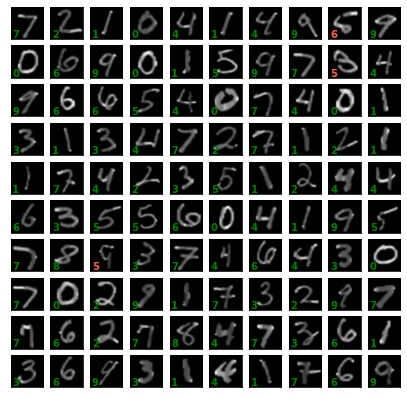

In [69]:
# Visualizing for first 100 values

preds_raw = cnn.predict(X_test)

# grab the predicted digit (based on the highest probability) for the entire dataset
preds = [np.argmax(pred) for pred in cnn.predict(X_test)]

# Visualizinf forat 100 values
fig, axes = plt.subplots(10, 10, figsize=(7, 7), subplot_kw={'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i], cmap='gray', interpolation='bicubic')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    pred = preds[i]
    act = Y_test[i]
    if pred == act:
        ax.text(0.05, 0.05, preds[i], color='green',
                weight='semibold', transform=ax.transAxes)
    else:
        ax.text(0.05, 0.05, preds[i], color='tomato',
                weight='semibold', transform=ax.transAxes)
plt.show();

## Conclusion:

We tried different parameter combinations for two models, i.e; MLP and CNN

**MLP:** Loss: 9.72%, Accuracy: 97.23%

**CNN:** Loss: 5.63%, Accuracy: 98.64%

For simpler model like Digit Classification we can use MLP model.